# LOAD DATA


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras import regularizers
import seaborn as sns

In [3]:
pd.read_csv('Crop_recommendation.csv')

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,2029.355362,rice
1,85,58,41,21.770462,80.319644,7.038096,2266.555374,rice
2,60,55,44,23.004459,82.320763,7.840207,2639.642476,rice
3,74,35,40,26.491096,80.158363,6.980401,2428.640342,rice
4,78,42,42,20.130175,81.604873,7.628473,2627.173405,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,1777.745075,coffee
2196,99,15,27,27.417112,56.636362,6.086922,1279.246100,coffee
2197,118,33,30,24.131797,67.225123,6.362608,1733.228386,coffee
2198,117,32,34,26.272418,52.127394,6.758793,1271.752928,coffee


In [4]:
dts = pd.read_csv('Crop_recommendation.csv')

In [5]:
dts.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
classes = dts['label'].unique()
numclasses = len(classes)
numclasses

22

In [7]:
classes

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
dts.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,2029.355362,rice
1,85,58,41,21.770462,80.319644,7.038096,2266.555374,rice
2,60,55,44,23.004459,82.320763,7.840207,2639.642476,rice
3,74,35,40,26.491096,80.158363,6.980401,2428.640342,rice
4,78,42,42,20.130175,81.604873,7.628473,2627.173405,rice


In [9]:
ft=dts[['N','P','K','temperature','humidity','ph','rainfall']]

In [10]:
label = pd.get_dummies(dts['label'])

In [11]:
from sklearn.model_selection import train_test_split
train_Xdt,test_Xdt,train_Ydt,test_Ydt=train_test_split(ft,label,test_size=0.3,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_Xdt = scaler.fit_transform(train_Xdt)

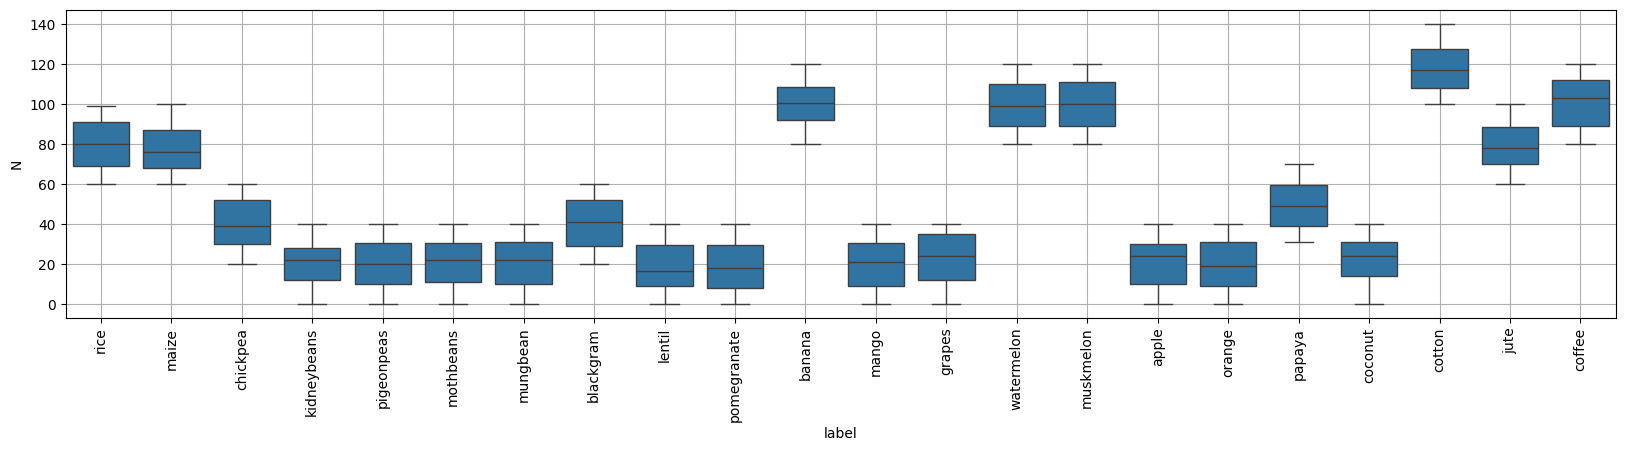

In [13]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.boxplot(data=ft, x = dts['label'], y = dts['N'])
plt.grid()
plt.show()

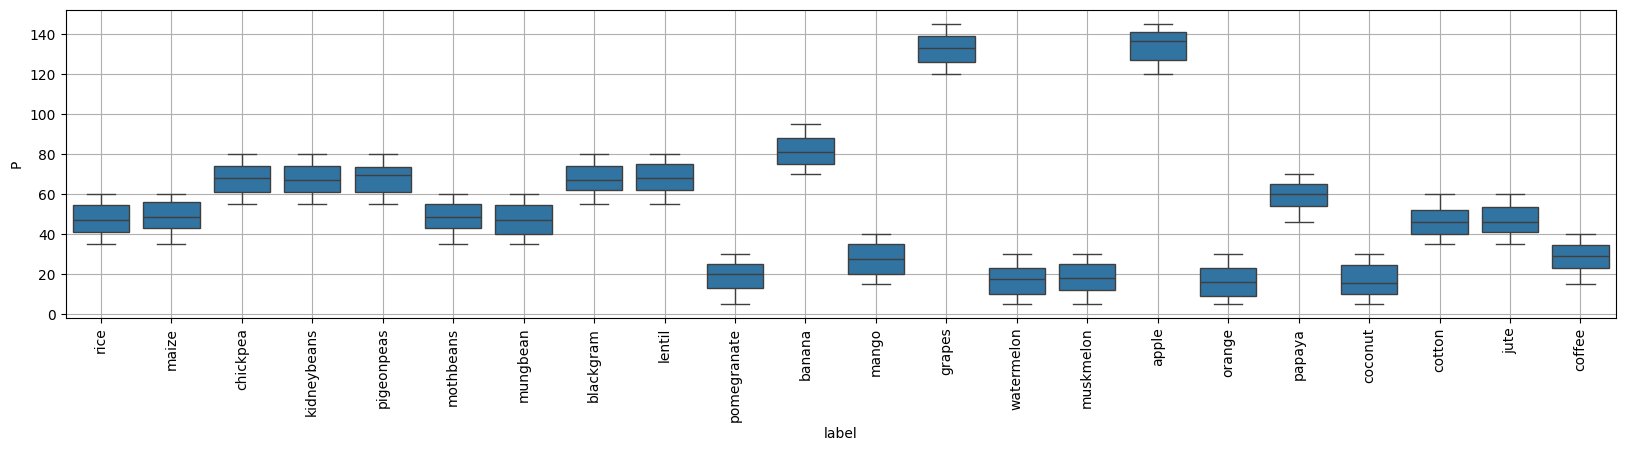

In [13]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.boxplot(data=ft, x = dts['label'], y = dts['P'])
plt.grid()
plt.show()

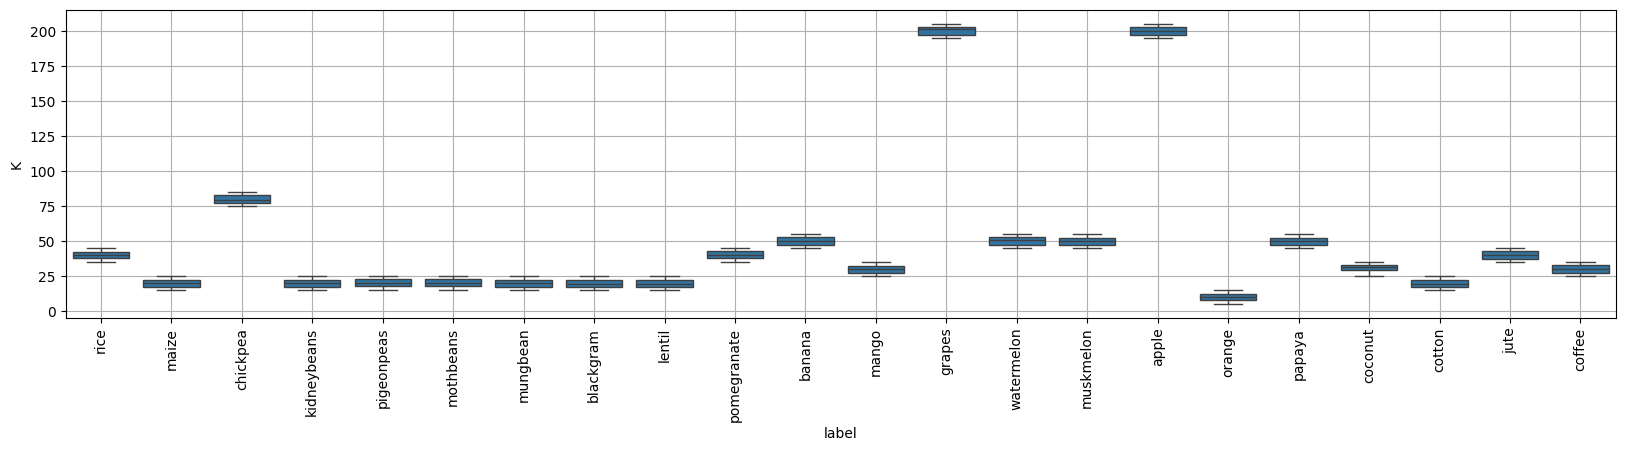

In [14]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.boxplot(data=ft, x = dts['label'], y = dts['K'])
plt.grid()
plt.show()

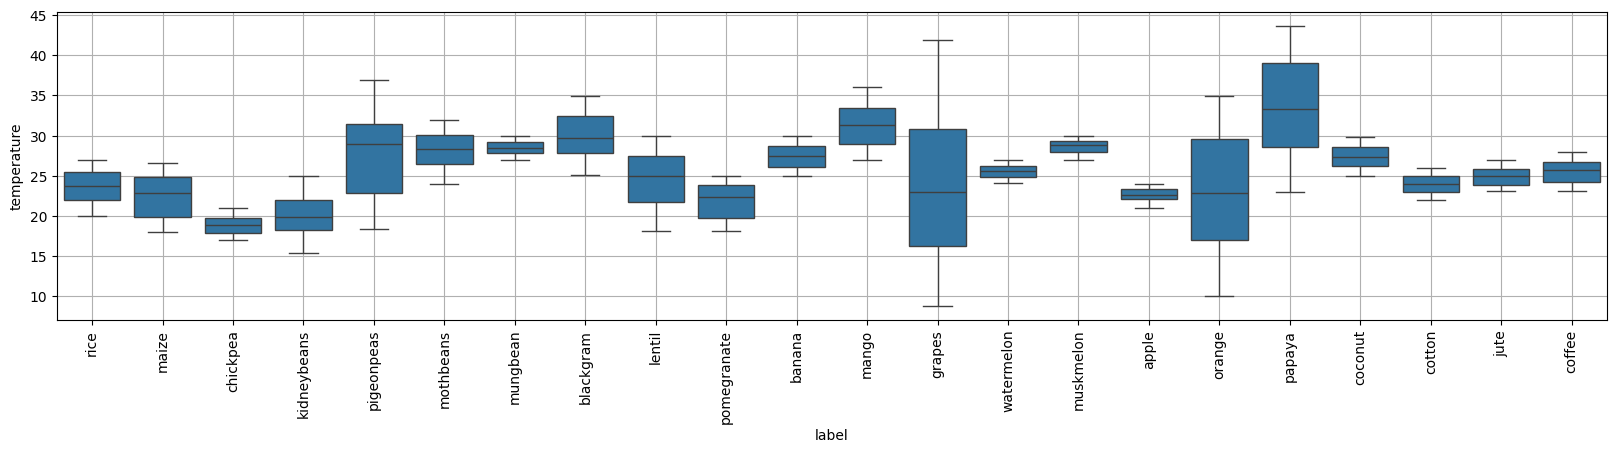

In [15]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.boxplot(data=ft, x = dts['label'], y = dts['temperature'])
plt.grid()
plt.show()

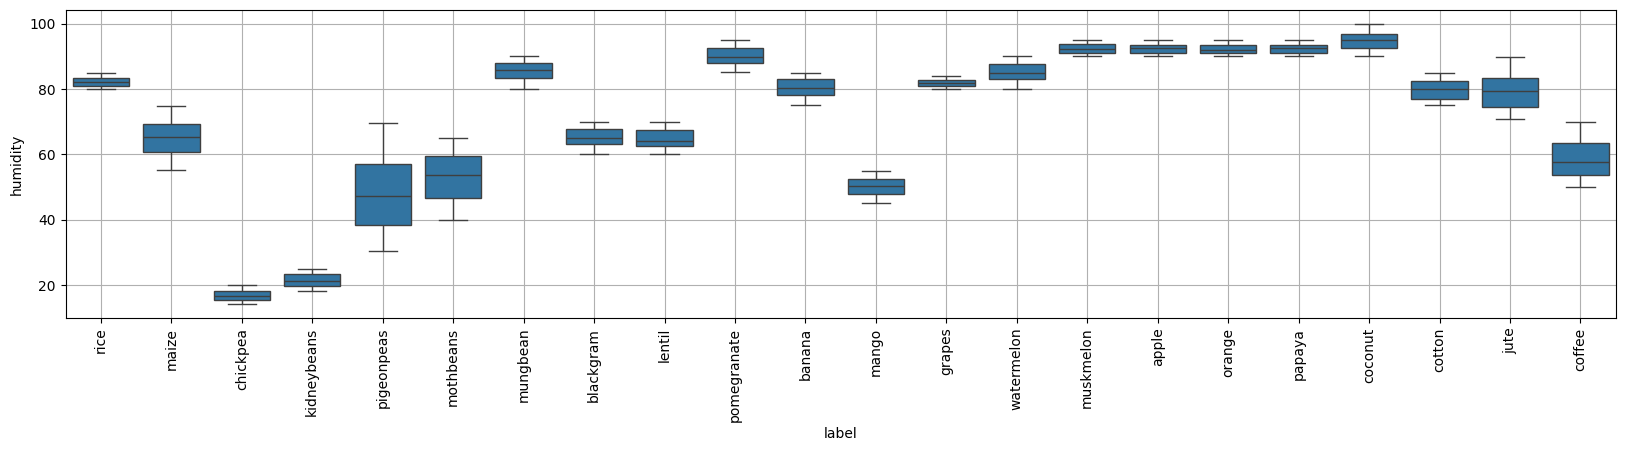

In [37]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.boxplot(data=ft, x = dts['label'], y = dts['humidity'])
plt.grid()
plt.show()

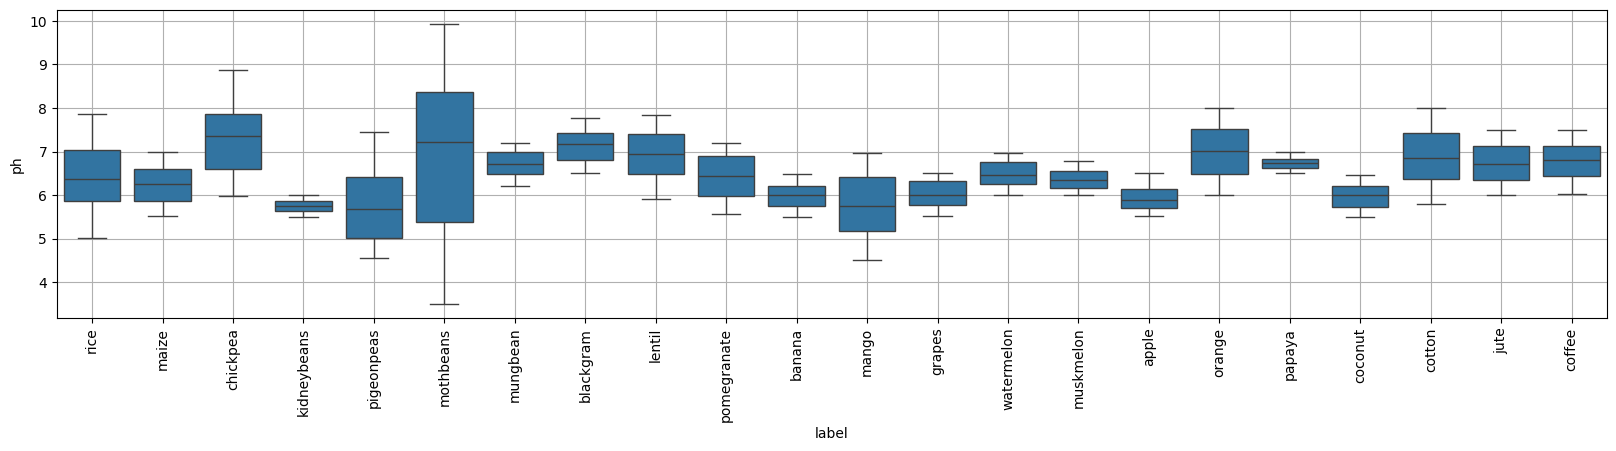

In [38]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.boxplot(data=ft, x = dts['label'], y = dts['ph'])
plt.grid()
plt.show()

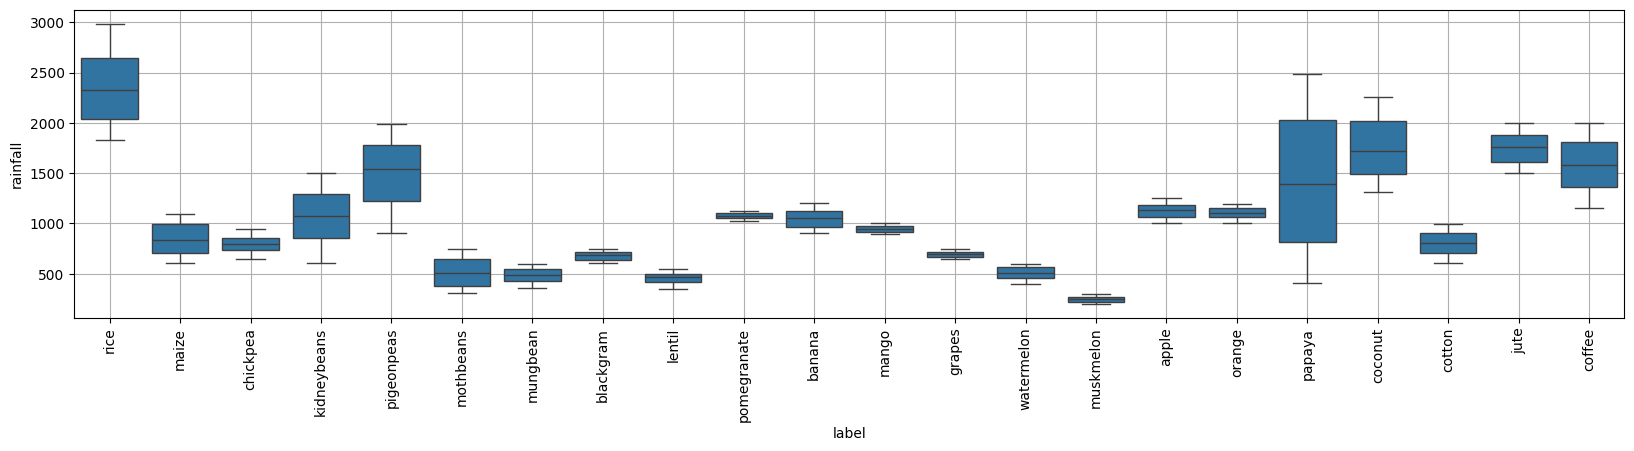

In [39]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.boxplot(data=ft, x = dts['label'], y = dts['rainfall'])
plt.grid()
plt.show()

# K-Nearest Neighbor 

In [12]:
from sklearn.preprocessing import  StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
label = le.fit_transform(dts['label'])
scaler = StandardScaler()

In [13]:
train_Xknn, test_Xknn , train_Yknn, test_Yknn = train_test_split(ft,label,test_size=0.3,random_state=42)
train_Xknn = scaler.fit_transform(train_Xknn)
test_Xknn = scaler.transform(test_Xknn)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 22)
model_knn = KNN.fit(train_Xknn,train_Yknn)
Y_predknn = model_knn.predict(test_Xknn)

In [16]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
knnacc = accuracy_score(test_Yknn,Y_predknn)
cm_knn = confusion_matrix(test_Yknn,Y_predknn)
knn_f1score = f1_score(test_Yknn,Y_predknn,average='weighted')
knn_f1score

0.9102490651035922

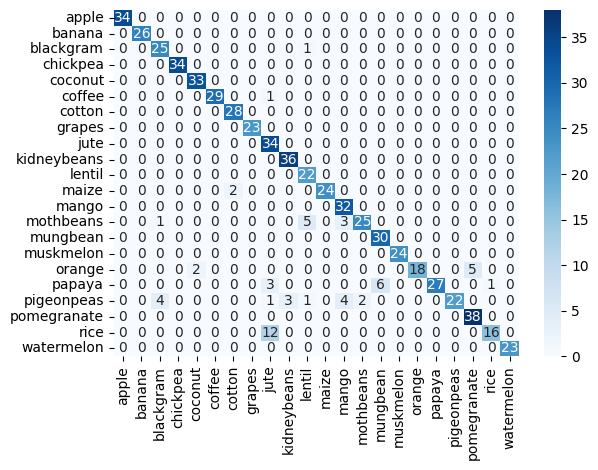

In [17]:
import seaborn as sns

ax = sns.heatmap(cm_knn, annot=True, cmap='Blues',
       xticklabels=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton',  'grapes',  'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'],
       yticklabels=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'])




plt.tight_layout()
## Display the visualization of the Confusion Matrix.
plt.show()

In [18]:
model_predict = np.array([[40,41,32,30,62,5.2,2100]])
model_predict = scaler.transform(model_predict)
result = model_knn.predict_proba(model_predict)
top = np.argsort(result)
top

c:\Users\trinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0, 19, 17, 16, 15, 14, 13, 12, 11, 10,  8,  7,  6,  5,  3,  2,
         1,  9, 21,  4, 20, 18]], dtype=int64)

 # LOGISTIC REGRESSION 

In [19]:
from sklearn.preprocessing import  StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
label = le.fit_transform(dts['label'])
scaler = StandardScaler()

In [20]:
train_Xlr,test_Xlr,train_Ylr,test_Ylr = train_test_split(ft,label,test_size=0.3,random_state=42)
train_Xlr = scaler.fit_transform(train_Xlr)
test_Xlr = scaler.transform(test_Xlr)


In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(train_Xlr,train_Ylr)
Y_predlr = model_lr.predict(test_Xlr)

In [22]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
lracc = accuracy_score(test_Ylr,Y_predlr)
cm_lr = confusion_matrix(test_Ylr,Y_predlr)
lr_f1score = f1_score(test_Ylr,Y_predlr,average='weighted')
lr_f1score

0.958852883181699

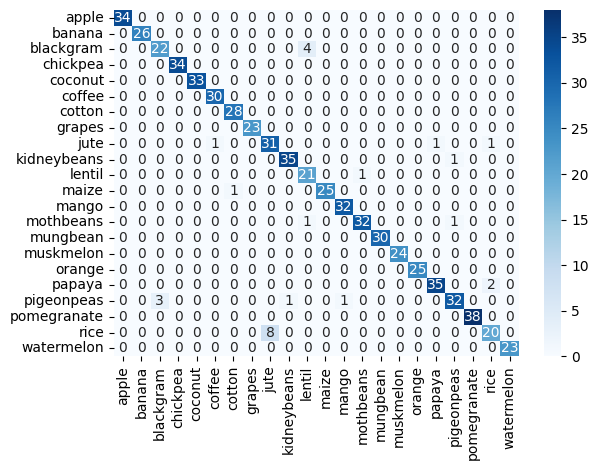

In [23]:
import seaborn as sns

ax = sns.heatmap(cm_lr, annot=True, cmap='Blues',
       xticklabels=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton',  'grapes',  'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'],
       yticklabels=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'])

plt.tight_layout()
plt.show()

 # SUPER VECTOR MACHINE (SVM)

In [24]:
from sklearn.preprocessing import  StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
label = le.fit_transform(dts['label'])
scaler = StandardScaler()


In [25]:
train_Xsvm,test_Xsvm,train_Ysvm,test_Ysvm = train_test_split(ft,label,test_size=0.3,random_state=42)
train_Xsvm = scaler.fit_transform(train_Xsvm)
test_Xsvm = scaler.transform(test_Xsvm)

In [26]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C = 1, probability = True)
model_svm = svm.fit(train_Xsvm,train_Ysvm)
Y_predsvm = model_svm.predict(test_Xsvm)

In [27]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
svmacc = accuracy_score(test_Ysvm,Y_predsvm)
cm_svm = confusion_matrix(test_Ysvm,Y_predsvm)
svm_f1score = f1_score(test_Ysvm,Y_predsvm,average= 'weighted')
svm_f1score

0.973771106883434

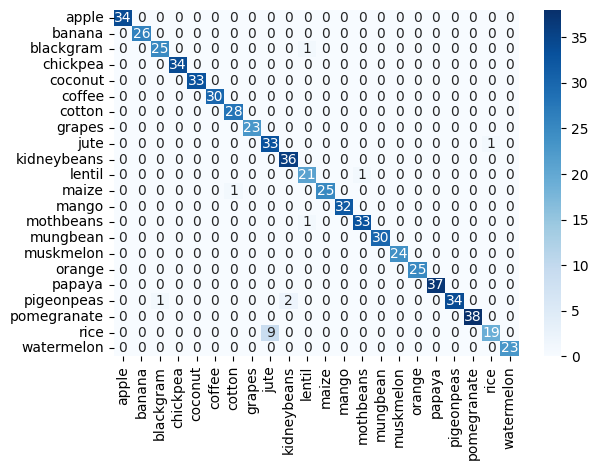

In [28]:
import seaborn as sns

ax = sns.heatmap(cm_svm, annot=True, cmap='Blues',
       xticklabels=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton',  'grapes',  'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'],
       yticklabels=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes',  'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'])



plt.tight_layout()
## Display the visualization of the Confusion Matrix.
plt.show()

 # DECISION TREE

In [27]:
from sklearn.preprocessing import  StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
label = le.fit_transform(dts['label'])


In [28]:
from sklearn.model_selection import train_test_split
train_Xdt,test_Xdt,train_Ydt,test_Ydt=train_test_split(ft,label,test_size=0.3,random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_Xdt = scaler.fit_transform(train_Xdt)
test_Xdt = scaler.transform(test_Xdt)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)

parameters_dict = {
    "criterion": ["gini", "entropy"],
    "max_depth": [6, 8, 12],
    "min_samples_split": [2, 4],
    "min_samples_leaf": [1, 2]
}
grid_obj = GridSearchCV(estimator=dtc, param_grid=parameters_dict, cv=10)
grid_obj.fit(train_Xdt, train_Ydt)
model_dt = grid_obj.best_estimator_
model_dt

DecisionTreeClassifier(max_depth=12, random_state=0)

In [30]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=12, criterion="gini", min_samples_split=2, min_samples_leaf=1).fit(train_Xdt, train_Ydt)

In [31]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, balanced_accuracy_score
y_test_argdt= test_Ydt
Y_preddt = model_dt.predict(test_Xdt)
dtacc = accuracy_score(y_test_argdt,Y_preddt)
cm_dt = confusion_matrix(y_test_argdt,Y_preddt)
dt_f1score = f1_score(y_test_argdt,Y_preddt,average='weighted')

In [32]:
dtacc

0.9833333333333333

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [14]:
def check(cri, mss, msl, testacc):
    for depth in range(1,13):
        # Creating a decision tree classifier with the given depth
        clf = DecisionTreeClassifier(criterion=cri, min_samples_leaf = msl, min_samples_split = mss, max_depth = depth, random_state = 42)
        # Fitting the classifier on the train set
        clf.fit(train_Xdt, train_Ydt)

        y_test_argdt= test_Ydt
        y_pred = clf.predict(test_Xdt)
        
        testacc.append(balanced_accuracy_score(y_test_argdt, y_pred))

In [16]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, balanced_accuracy_score
testacc1 = []
testacc2 = []
testacc3 = []
testacc4 = []
testacc5 = []
testacc6 = []
testacc7 = []
testacc8 = []
check('entropy',2,1, testacc1)
check('entropy',2, 2,testacc2)
check('entropy',4, 1,testacc3)
check('entropy',4, 2,testacc4)
check('gini',2,1, testacc5)
check('gini',2, 2, testacc6)
check('gini',4, 1, testacc7)
check('gini',4, 2,testacc8)

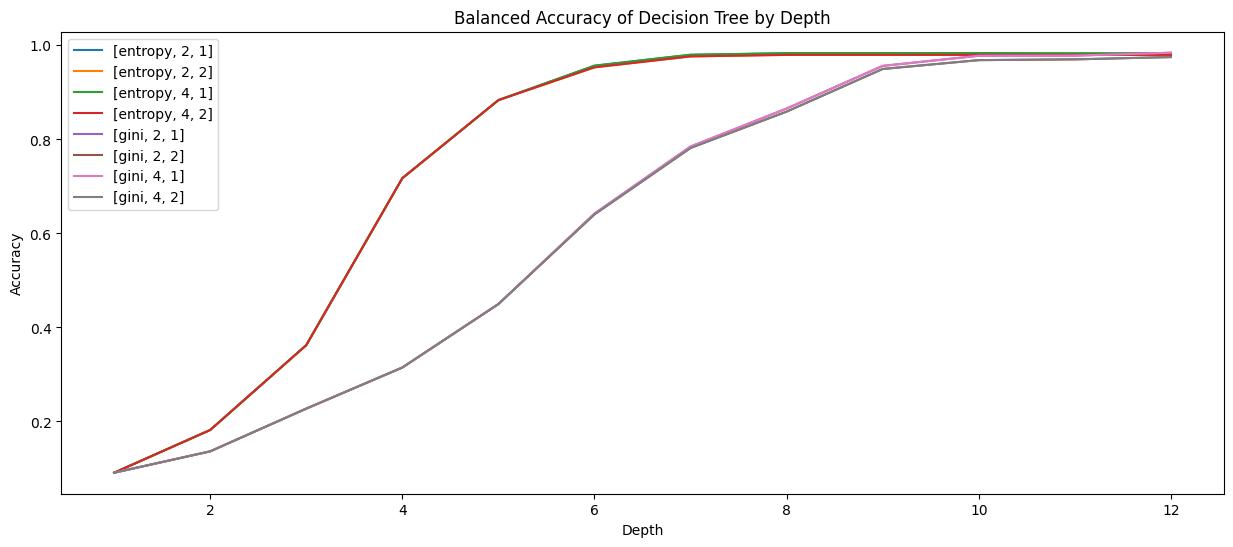

In [18]:
plt.figure(figsize=(15, 6))
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.plot(depths, testacc1, label='[entropy, 2, 1]')
plt.plot(depths, testacc2, label='[entropy, 2, 2]')
plt.plot(depths, testacc3, label='[entropy, 4, 1]')
plt.plot(depths, testacc4, label='[entropy, 4, 2]')
plt.plot(depths, testacc5, label='[gini, 2, 1]')
plt.plot(depths, testacc6, label='[gini, 2, 2]')
plt.plot(depths, testacc7, label='[gini, 4, 1]')
plt.plot(depths, testacc8, label='[gini, 4, 2]')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Balanced Accuracy of Decision Tree by Depth')
plt.legend()
plt.show()

In [85]:
dt_f1score

0.9833825340492005

In [86]:
dtacc

0.9833333333333333

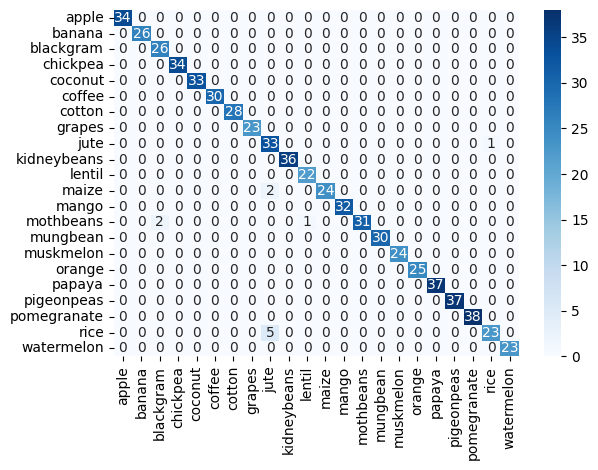

In [87]:
import seaborn as sns

ax = sns.heatmap(cm_dt, annot=True, cmap='Blues',
       xticklabels=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton',  'grapes',  'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'],
       yticklabels=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton',  'grapes',  'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'])




plt.tight_layout()
## Display the visualization of the Confusion Matrix.
plt.show()

In [105]:
model_predict = np.array([[120,40,32,30,62,6.2,1300]])
model_predict = scaler.transform(model_predict)
result = model_dt.predict_proba(model_predict)
top = np.sort(result)
top

c:\Users\trinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1.]])

In [59]:
labell = np.argsort(result)
labell

array([[ 0, 19, 18, 17, 16, 15, 14, 13, 11, 20, 10,  8,  7,  6,  5,  4,
         3,  2,  1,  9, 21, 12]], dtype=int64)

#  NEURAL NETWORK

In [33]:
label = pd.get_dummies(dts['label'])

In [34]:
from sklearn.model_selection import train_test_split
train_X,test_val_X,train_Y,test_val_Y=train_test_split(ft,label,test_size=0.3,random_state=42)


In [35]:
val_X, test_X, val_Y, test_Y = train_test_split(test_val_X, test_val_Y, test_size=0.5)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
val_X = scaler.transform(val_X)
test_val_X = scaler.transform(test_val_X)

In [37]:
test_Y1 = test_Y
val_Y1 = val_Y
test_val_Y1 = test_val_Y
test_Y1 = scaler.fit_transform(test_Y1)
val_Y1 = scaler.transform(val_Y1)
test_val_Y1 = scaler.transform(test_val_Y1)

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation = 'relu',kernel_regularizer=regularizers.l2(0.0001) ,input_shape = (7,)),
    tf.keras.layers.Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dense(64, activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dense(numclasses, activation = 'softmax',kernel_regularizer=regularizers.l2(0.0001))
])

In [39]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.009, momentum = 0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 22)                1430      
                                                                 
Total params: 44630 (174.34 KB)
Trainable params: 44630 (174.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
history = model.fit(train_X, train_Y, epochs = 40, validation_data = (val_X, val_Y), batch_size = 32)

Epoch 1/40
49/49 [==============================] - 1s 7ms/step - loss: 3.1271 - accuracy: 0.0494 - val_loss: 3.0433 - val_accuracy: 0.1121
Epoch 2/40
49/49 [==============================] - 0s 2ms/step - loss: 2.9871 - accuracy: 0.1812 - val_loss: 2.9082 - val_accuracy: 0.2485
Epoch 3/40
49/49 [==============================] - 0s 2ms/step - loss: 2.8000 - accuracy: 0.3370 - val_loss: 2.6637 - val_accuracy: 0.4697
Epoch 4/40
49/49 [==============================] - 0s 2ms/step - loss: 2.5131 - accuracy: 0.5110 - val_loss: 2.3435 - val_accuracy: 0.4545
Epoch 5/40
49/49 [==============================] - 0s 2ms/step - loss: 2.1593 - accuracy: 0.5792 - val_loss: 1.9676 - val_accuracy: 0.6061
Epoch 6/40
49/49 [==============================] - 0s 2ms/step - loss: 1.7906 - accuracy: 0.6545 - val_loss: 1.6286 - val_accuracy: 0.6515
Epoch 7/40
49/49 [==============================] - 0s 2ms/step - loss: 1.4633 - accuracy: 0.7117 - val_loss: 1.3426 - val_accuracy: 0.7455
Epoch 8/40
49/49 [==

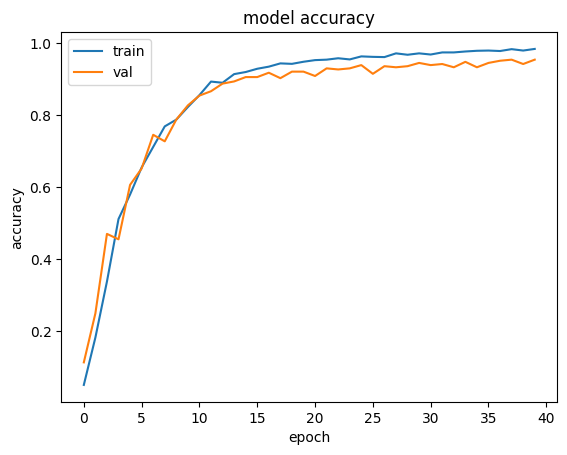

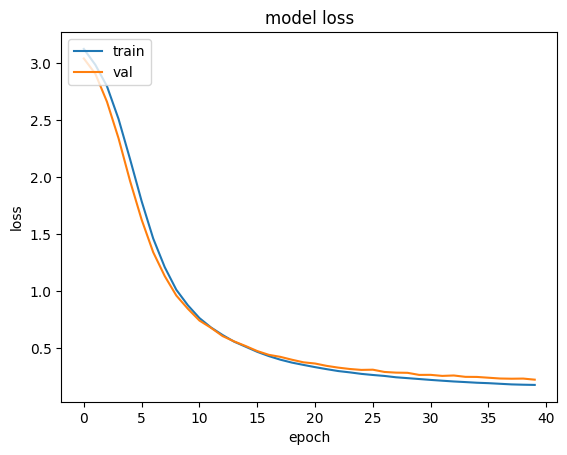

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [43]:
nnloss,nnacc = model.evaluate(test_X,test_Y)

11/11 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.9636


In [44]:
nnacc

0.9636363387107849

In [83]:
from sklearn.metrics import  confusion_matrix,f1_score

In [84]:
y_test_arg=np.argmax(test_Y1,axis=1)
Y_pred = np.argmax(model.predict(test_X),axis=1)
nn_f1 = f1_score(y_test_arg,Y_pred, average='weighted')
nn_f1

11/11 [==============================] - 0s 1ms/step


0.9703570178083398

In [26]:
cm=confusion_matrix(y_test_arg, Y_pred)

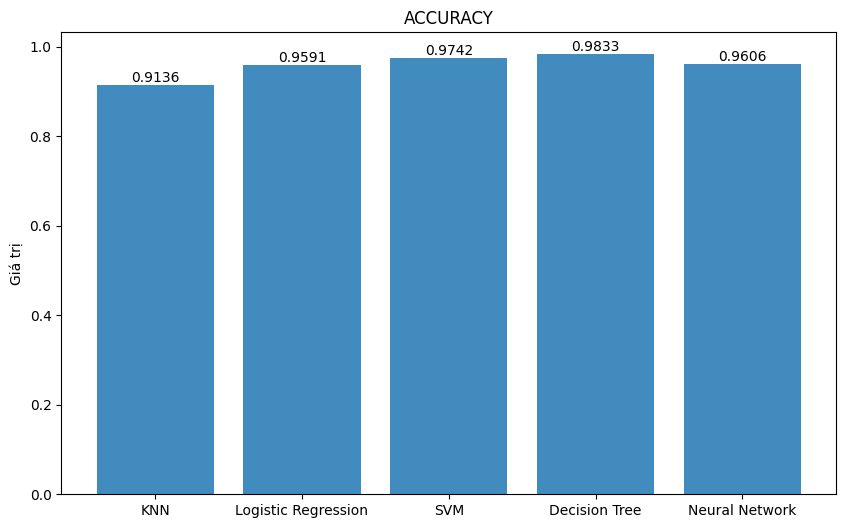

In [129]:
import matplotlib.pyplot as plt
f1score_all = np.array([knnacc,lracc,svmacc,dtacc,nnacc])
labels = ['KNN','Logistic Regression', 'SVM', 'Decision Tree', 'Neural Network']
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, f1score_all, align='center', alpha=0.85, ecolor='black', capsize=5)
ax.set_ylabel('Giá trị')
ax.set_title('ACCURACY')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + .0005, round(yval, 4), ha='center', va='bottom')

plt.show()

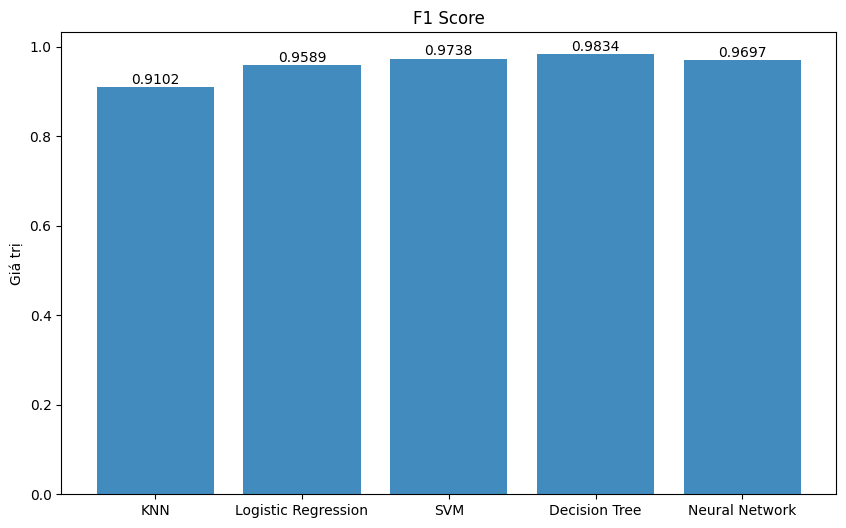

In [113]:
import matplotlib.pyplot as plt
f1score_all = np.array([knn_f1score,lr_f1score,svm_f1score,dt_f1score,nn_f1])
labels = ['KNN','Logistic Regression', 'SVM', 'Decision Tree', 'Neural Network']
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, f1score_all, align='center', alpha=0.85, ecolor='black', capsize=5)
ax.set_ylabel('Giá trị')
ax.set_title('F1 Score')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + .0005, round(yval, 4), ha='center', va='bottom')
plt.show()

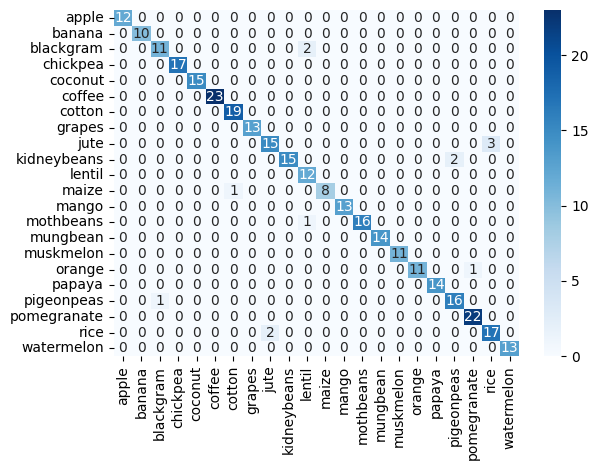

In [27]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues',
       xticklabels=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice','watermelon'],
       yticklabels=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton',  'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'])



plt.tight_layout()
## Display the visualization of the Confusion Matrix.
plt.show()

In [85]:
model_predict = np.array([[120,60,60,29.5,75,7.2,2500]])
model_predict = scaler.transform(model_predict)
result = model.predict(model_predict,0)
top = np.argsort(result[0])
top

1/1 [==============================] - 0s 22ms/step


c:\Users\trinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([15, 14, 13,  9, 10,  3, 19,  7, 16, 21,  0, 12,  4, 11,  6,  2,  5,
       17,  1, 18, 20,  8], dtype=int64)

In [87]:
labell = np.argsort(result[0])
labell

array([15, 14, 13,  9, 10,  3, 19,  7, 16, 21,  0, 12,  4, 11,  6,  2,  5,
       17,  1, 18, 20,  8], dtype=int64)

In [28]:
import joblib
joblib.dump(model,'TTr.joblib')

['TTr.joblib']

In [84]:
import joblib

model = joblib.load(open('TTr.joblib','rb'))


In [220]:
model_predict = np.array([[90,30,40,24.5,62,7.5,2122]])
model_predict = scaler.transform(model_predict)
result = model.predict(model_predict,0) 
acc_score = np.sort(result[0])
top = np.argsort(result[0])

1/1 [==============================] - 0s 50ms/step


c:\Users\trinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [183]:
top

array([14, 15, 10,  7, 17, 16,  1, 19,  3,  4,  9, 13, 21,  0,  2,  6, 18,
       12, 11, 20,  8,  5], dtype=int64)

In [184]:
acc_score

array([1.42530519e-06, 1.99424449e-06, 8.53018173e-06, 2.96644539e-05,
       4.87578072e-05, 1.75209745e-04, 1.92352119e-04, 2.39082176e-04,
       2.59260007e-04, 2.62854242e-04, 2.77255283e-04, 2.97758175e-04,
       3.39350547e-04, 3.47006979e-04, 4.11800487e-04, 5.25532756e-04,
       3.87249608e-03, 9.59421787e-03, 1.07223457e-02, 1.81047004e-02,
       1.16155505e-01, 8.38132858e-01], dtype=float32)

# SERVER

In [20]:
from flask import Flask,request,jsonify
from flask_ngrok import run_with_ngrok
import numpy as np
import pickle
import joblib
import serial
import time 
import urllib3
from pyngrok import ngrok
import requests
ser = serial.Serial("COM3", 9600)
if not ser.isOpen():
     ser.open()
app = Flask(__name__)
run_with_ngrok(app)
model = joblib.load(open('TTr.joblib','rb'))
@app.route('/')
def index():
    return "Done"

@app.route('/predict',methods=['POST'])
def predict():
    N = float(request.form.get('N',False))
    P = float(request.form.get('P',False))
    K = float(request.form.get('K',False))
    for i in range(2):
          pH = ser.readline();
          T = ser.readline()
          T = float(T)
          H = ser.readline()
          H = float(H)
          time.sleep(0.2)
    rainfall = 2122.0
    # pH = 6.7
    # T = 26.7
    # H = 67
    input_query = np.array([[N,P,K,T,H,pH,rainfall]])
    input_query = scaler.transform(input_query)
    model_predict = model.predict(input_query,0)
    top = np.argsort(model_predict[0])
    acc = np.sort(model_predict[0])
    result_lb1 = top[21]
    result_acc1 = acc[21]
    result_lb2 = top[20]
    result_acc2 = acc[20]
    result_lb3 = top[19]
    result_acc3 = acc[19]
    result_lb4 = top[18]
    result_acc4 = acc[18]
    pH = pH.decode()
    pH = pH.strip()
    return jsonify({'Nhan 1':str(result_lb1), 'Acc 1':str(result_acc1 * 100), 
                    'Nhan 2':str(result_lb2), 'Acc 2':str(result_acc2 * 100), 
                    'Nhan 3':str(result_lb3), 'Acc 3':str(result_acc3 * 100), 
                    'Nhan 4':str(result_lb4), 'Acc 4':str(result_acc4 * 100),
                    'pH':str(pH), 'Nhiet do':str(T),'Do am':str(H),'Luong mua':str(rainfall)})

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


 * Running on http://a654-2401-d800-f1c2-3ece-e1c9-f239-49ea-ddc9.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


c:\Users\trinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 257ms/step


127.0.0.1 - - [22/Mar/2024 09:10:37] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 49ms/step


c:\Users\trinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [22/Mar/2024 09:10:39] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 49ms/step


c:\Users\trinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [22/Mar/2024 09:11:04] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 51ms/step


c:\Users\trinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [22/Mar/2024 09:12:24] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 30ms/step


c:\Users\trinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [22/Mar/2024 09:14:09] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 35ms/step


c:\Users\trinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [22/Mar/2024 09:21:35] "POST /predict HTTP/1.1" 200 -
